1024 202 0.25


<IPython.core.display.Javascript object>


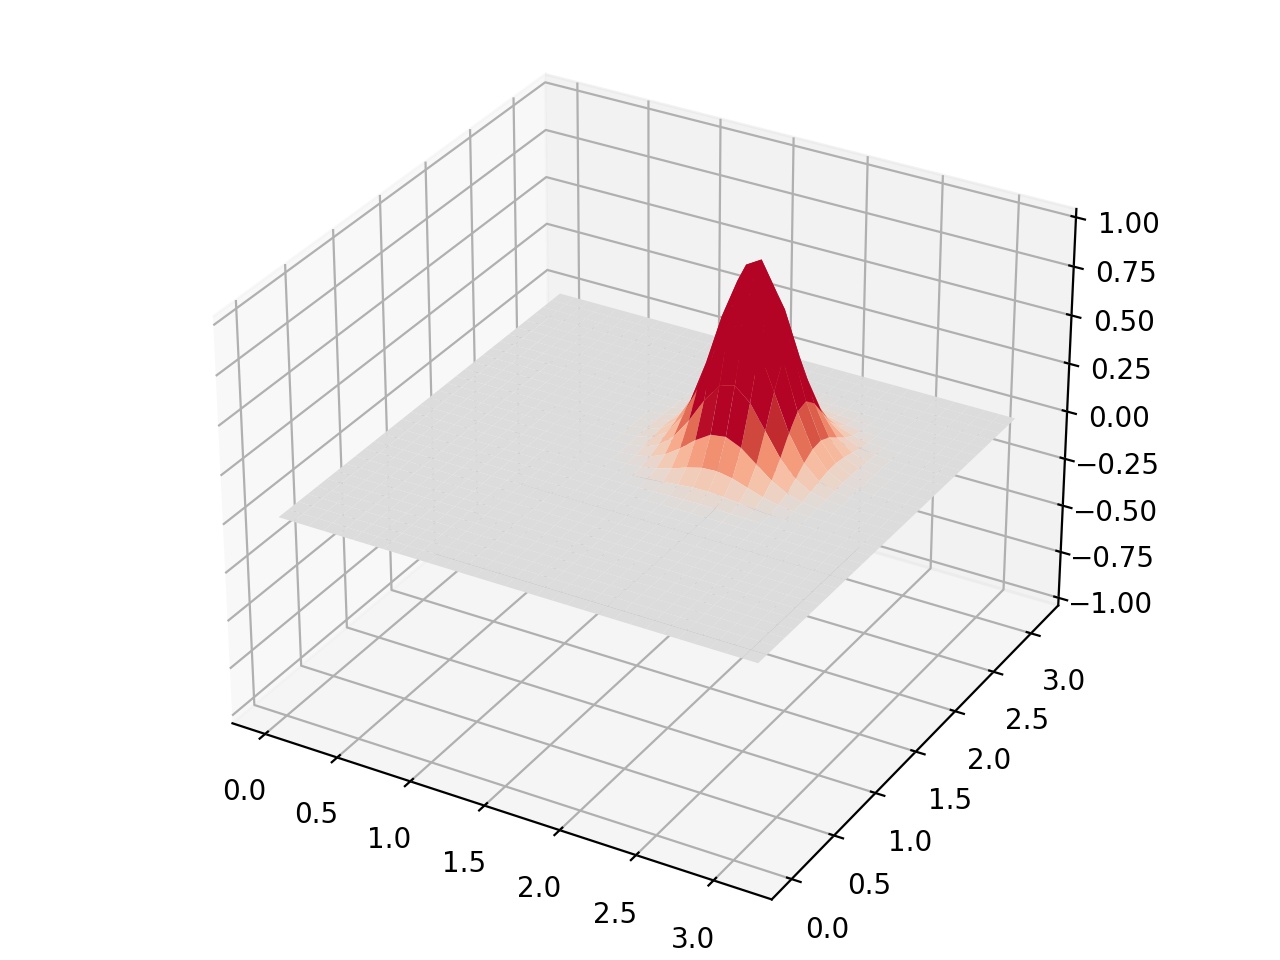

In [10]:
%matplotlib nbagg 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter, FuncAnimation

import matplotlib

dx = 0.1
dy = dx
dt = 0.05
tmin = 0.0 
tmax = 6.0 #simulate time

#rectangler domain
xmin = 0.0
xmax = np.pi
ymin = 0.0
ymax = np.pi

#propagation speed
c = 1.0 
#constant
alpha = (c*dt/dx)**2 

nx = int((xmax-xmin)/dx) + 1
ny = int((ymax-ymin)/dy) + 1
nt = int((tmax-tmin)/dt) + 2
print(nx*ny,nt,alpha)

def tridiag(a,b,c,N):
    A = np.zeros([N,N])
    np.fill_diagonal(A[1:,:-1],a)
    np.fill_diagonal(A[:-1,1:],c)
    np.fill_diagonal(A,b)
    return A
#mesh
X = np.linspace(xmin, xmax, nx)
Y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(Y, X)

#solution
u = np.zeros((nt,nx,ny))

#initial data
u_0 = np.exp(-((X-2)**2)*10)*np.exp(-((Y-2)**2)*10)
#np.sin(X)*np.sin(Y)#np.exp(-((X-2)**2)*10)*np.exp(-((Y-2)**2)*10)
u_1 = np.zeros((nx,ny))

u[0] = u_0
u[1] = u[0] + dt * u_1

#%%time
B = tridiag(alpha,1-2*alpha,alpha,nx)
#simulation

for t in range(1,nt-1):
    u[t+1] = u[t]@B + B@u[t] - u[t-1]
    u[t+1,:,0] = np.zeros(nx)
    u[t+1,:,ny-1] = np.zeros(nx)
    u[t+1,0,:] = np.zeros(ny)
    u[t+1,nx-1,:] = np.zeros(ny)
    
#%%time
fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)

def animate(i):
    ax.clear()
    ax.plot_surface(X, Y, u[i], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=0.3,vmin=-0.3)
    ax.set_zlim(-1, 1)
    
anim = FuncAnimation(fig,animate,frames=(nt-1),interval=20,repeat=True)
#anim.save("wave2D01.gif", writer=PillowWriter(fps=60))
plt.show()